# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- As I can see from the simulation, the white smartcab is not moving at all, even when there is a green light.

- There are two kinds of reward. When the light is green and the cab is not moving, the cab gets negative reward, which means it's being punished. When the light is red and the cab is not moving, the cab gets positive reward.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- In agent.py, we can find three flags
    1. learning: this flag can be set to be true or false, indicating whether the agent is expected to learn. We can see that when the agent is initialized, it's set to be false which means it's not learning.
    2. epsilon: Random exploration factor. It's not clear what's the usage of this flag.
    3. alpha: learning factor. In [Q-learning](https://en.wikipedia.org/wiki/Q-learning) and [more explicitly](http://artint.info/html/ArtInt_265.html), this parameter controls how fast the agent is learning. If $\alpha$ is set to be $0$, then the agent is not learning from the current exploration at all. If $\alpha$ is set to be $1$, then it's totally forgetting what it learned before and focus on on the immediate reward, like a short-sighted person.
    
- When an agent performs an action, the "act" function in Environment class is called.

- As written in the comment of "render_text" and "render", "render_text" output a text message of the simulated trial data and "render" use GUI (Graphical user interface) to display the simulation.

- The "next_waypoint" function consider the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


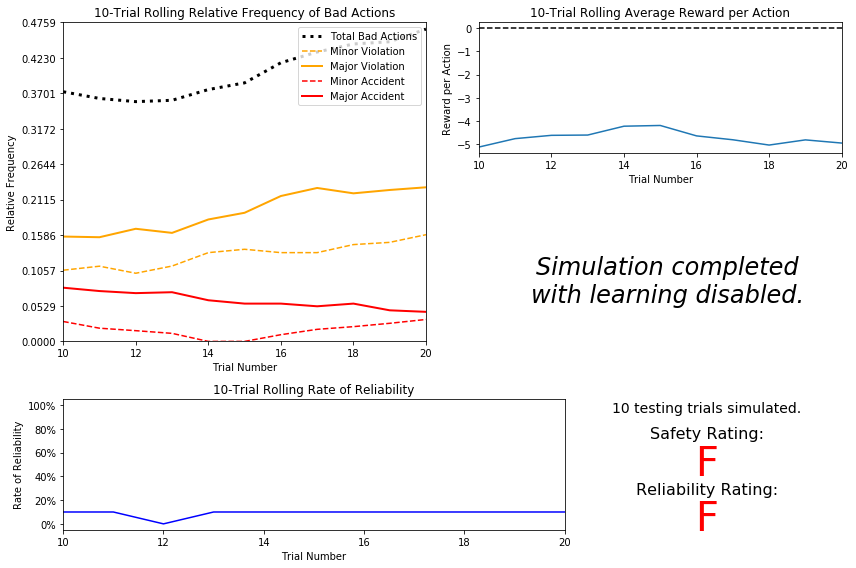

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- From the upper left panel, we can see that in the 20 training trial, the total frequency of making bad actions is between 0.37 and 0.47. The frequency of causing minor accidents is between around 0 and 0.03 while that of causing major accident is between around 0.529 and 0.075.

- The rate of reliability does not make sense becuase the agent is not driving toward the goal.

- From the upper right panel we can see that the average reward per action in the 10 testing trial is around -4~-5. It has been punished heavily.

- As the number of trials increases, the rate of reliability and average reward is not improving at all. From the upper left panel we can see that the relative frequency of bad actions is increasing. Frequency of violationas are increasing. The only exception is that the frequency of major accident is decreasing. But since the cab is randomly choosing its action, that can only be a coincidence.

- No. Both safety rating and reliability rating are F which indicates that it's neither safe nor reliable.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

- The features that will be relevant for learning safety and efficieny are the follows:
    1. 'waypoint': this feature is relevant for learning efficiency. A smartcab has to plan how to take action to arrive at the destination in the shortest time. This feature is like a GPS that tells where the cab is and where the destination is. We even need this feature to tell if the cab already arrived at the destination.
    2. 'light': this feature is no doubt the most important feature for safety.
    3. 'left': If a cab wants to turn right when the red light is one, it has to observe if the car on the left is driving forward or turning. If the car on the left is driving forward, then our cab cannot turn right. It's important for safety.
    4. 'oncoming': If we want to turn left, then we have to observe that if the oncoming car is turning right or going forward. If it is turning right or going forward, we cannot turn left. It's relevant for safety.

- The features that are not relevant are the follows:
    1. 'right': Whatever the car on the right is doing, it's not going to have a possible intersection with our cab(of course assuming it is following the traffic rule). So it's not relevant.
    2. 'deadline': Even if we know the deadline, there is no reason for us to change our action because the policy we are currently following is already the best we can estimate. So it should be relevant.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

- The 'waypoint' feature has $4$ states: None, left, right, forward.

- The 'light' feature has $2$ states: red, green.

- The 'left' feature has $4$ states: None, forward, left, right

- The 'oncoming' feature has $4$ states: None, forward, left, right

To summarize, there will be $4\times 2\times 4\times 4 = 128$ states.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

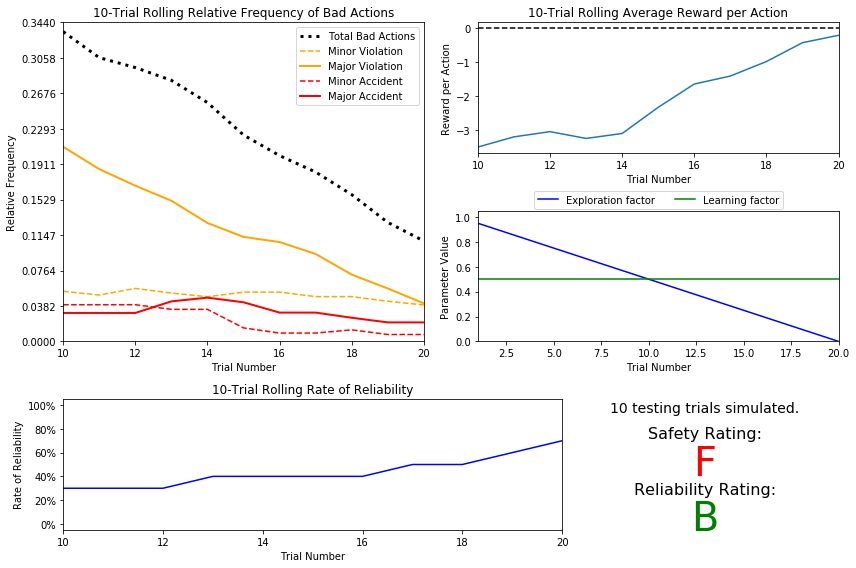

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

For questions in Question 3

- From the upper left panel, we can see that in the 10 test trial, the total frequency of making bad actions is decreasing from 0.3440 to 0.1147. All kinds of violations and accidents are decreasing during the training period.

- The rate of reliability now make sense becuase the agent is enforced to drive toward the goal.

- From the upper right panel we can see that the average reward per action in the is increasing from -5 to nearly 0 which implies the agent is getting more reward in the process of learning.

- As the number of trials increases, the rate of safety is dramatically increasing as shown by the upper left panel. The rate of reliability is also improving as can be observed in the lower left panel.

- We can see that the agent is getting safer and more reliable.

For additional questions

- The only similarity between the basic agent and the default q-learning agent is that the safety score is 'F' in both cases. But we can see that the safety is actually improving as shown by the upper left panel.

- The agent requires approximately 20 training trials before testing. This number make sense because the initial value of $\epsilon$ is 1 and $\epsilon$ decreases by 0.05 after each training trial. After 20 trials, $\epsilon$ will be 0 which means it's not learning after 20 trials.

- The decaying function I implemented for $\epsilon$ is accurately shown in the panel of "exploration factor" and "learning factor". We can see that the line for exploration factor is exactly $\epsilon(t) = 1 - 0.05t$.

- The number of bad actions does decrease when the number of trials increases as shown in the upper left panel. The reward is increasing as shown in the upper right panel.

- Both safety and reliability are significantly improving compared to the initial driving agent. Although we still get 'F' in safety, the safety is actually improving as shown in the upper left panel. Maybe the agent just needs more trainings to get good safety rate. Reliability is improving from 'F' to 'B', which is quite amazing.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
For questions in Question 3

- From the upper left panel, we can see that in the 150 training trial, the total frequency of making bad actions is decreasing from 0.459 to 0.051. All kinds of violations and accidents are decreasing to near 0 during the training period.

- From the upper right panel we can see that the average reward per action is increasing from -5 to nearly 2 which implies the agent is getting more reward in the process of learning.

- As the number of trials increases, the rate of safety is dramatically increasing as shown by the upper left panel. The rate of reliability sometimes improves and sometimes worsens. But the trend for both safety and reliability is going up. 

- We can see that the agent is getting more and more safe and reliable.

For additional questions in Question 6 and 7

- The decaying function I'm using is $\epsilon(t) = cos(\frac{\pi}{300}t)$.

- The epsilon-tolerance I used is $0$ and learning rate($\alpha$) I used is $\alpha = 0.75$. The reason I used $\alpha = 0.75$ is that after several testing on choice of $\alpha$(I tried 0.75,0.5,0.25,0.1,0.15), I found that this choice of $\alpha$ can give me the best result. The reason why it should be this value will be explained later.

- The agent requires approximately 150 training trials before testing. This number make sense because the initial value of $\epsilon(0)$ is 1 and $\epsilon(150) = cos(\frac{\pi}{2}) = 0$. After 150 trials, $\epsilon$ will be 0 which means it's not learning after that.

- The decaying function I implemented for $\epsilon$ is accurately shown in the panel of "exploration factor" and "learning factor". We can see that the line for exploration factor is exactly $\epsilon(t) = cos(\frac{\pi}{300}t)$.

- Safety is significantly improving compared to the initial driving agent. We get a 'A+' compared to the 'F' before. Reliability is also improving compared to the initial driving agent. We get a 'A+' compared to 'B' before.

- I'm satisfied with the result.

However, there is some comments:

- The process is not stable. If I run it under the same decaying function and $\alpha$, I will not always get the same result. There is some randomness in the simulation.

- A good combination of $\alpha$ and $\epsilon$ has to be choosen to make the result good. Some comments are:
    1. $\epsilon$ cannot decay too fast. If I use the exponential function or even inverse quadratic function, the function will be decaying too fast. The agent will not have chance to explore and learn enough before $\epsilon$ reaches its tolerance.
    2. $\alpha$ cannot be set to be too small. In the process of trying different $\alpha$, I can see that $\alpha = 0.5$ will give a better reliability than safety. Actually even if the agent gets enough chance to explore (with the $\epsilon$ function the same as the one I chose), the agent usually gets 'F' in safety. That implies that the agent is putting more weight on reliability (if the agent arrives on time) than the immediate reward (if the agent is following the traffic rule). So $\alpha$ has to be tuned to be higher than $0.5$ to make the agent short sighted in order to improve safety.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

- In this particular setting, the optimal policy can be defined as follows. We dicuss about my expected optimal policy.

    If light = green
        If waypoint = left
            If oncoming = right or forward
                 then action = None
            If oncoming = left or None
                then action = left
        If waypoint = forward or right or None    
            then action = waypoint    

    If light = red
        If waypoint = left or forward or None
            then action = None
        If waypoint = right
            If left = forward
                then action = None
            If left = right or left
                then action = right 
    
    However, there is one thing I want to point out. An optimal policy should be a 'correct' one, however, a correct policy (which means it follows the traffic rule) may not be an 'optimal' one. For example, when the light is red, a cab can choose to turn right or still follow the waypoint and does nothing. That can affect if the cab can arrive on time. So it seems that although the policy I give above is a correct one (at least it follows the rule), it may not be an optimal one.


- There is some state where the Q function does not give an optimal solution I expected. However, all of them are correnct which means they follow the traffic rule. For example 
    1. ('left', 'red', 'right', 'left') where the optimal action I expected should be None but it's still correct. 
        
     -- forward : -9.15
 
     -- right : 0.97
 
     -- None : 0.90
 
     -- left : -8.05
     
    2.  ('left', 'green', 'left', 'forward') where the expected optimal should be None but it's still correct.
    
     -- forward : 1.39
 
     -- right : 0.00
 
     -- None : 0.00
 
     -- left : -15.49
     
     
- Some examples that demonstrate that the cab learns the optimal policy:
    1. ('left', 'green', 'left', 'left') where the expected optimal action should be left. The agent learns that it can turn left.
      -- forward : 0.41
      
     -- right : 0.68
 
     -- None : -4.31
 
     -- left : 1.25
 
    2. ('forward', 'red', 'right', 'left') where the expected optimal action is None. The agent learns that it should not move
    -- forward : 0.00
      
    -- right : 0.31
     
    -- None : 2.29
     
    -- left : -9.50
     
    3. ('right', 'red', 'forward', None) where the expected optimal action is None. The agent learns that what should it do if it's turning right on red light and the left car is going forward.
     -- forward : -39.56
     
     -- right : -20.07
     
     -- None : 0.83
     
     -- left : -39.83

- There are two types of entries that a cab did not learn the expected optimal policy. I will give two examples to illustrate each of them.
    1. The first type is an obviously suboptimal entry. For example:
        ('forward', 'green', 'right', 'right') where the optimal should be forward but it chooses forward.
        
     -- forward : 0.00
 
     -- right : 1.26
 
     -- None : -4.47
 
     -- left : -15.58
     
     We can see that the Q-value for "forward" is 0.0, that probably means the agent has not explored this action under this state. So this kind of suboptimal entry happens because lack of exploration.
     
    2. The second type of action is not the expected optimal action, however, it can happen that this action is actually optimal. For example,
     
     ('left', 'red', 'right', 'left') where the expected optimal action is None. However, the agent will take "right".
        
     -- forward : -9.15
 
     -- right : 0.97
 
     -- None : 0.90
 
     -- left : -8.05
     
     The reason behind this "appeared suboptimal" action is that in the situation of a red light, the cab can choose to wait (None) or turn right (right). There is no obvious reason why the cab should choose to wait or turn right. The maximal Q-value is achieved by taking right. The reason may be that the cab thinks taking right can avoid wasting time on red light.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The first characteristic is about the environment. The second is about the smartcab

- One important characteristic of the environment is how the reward and penalty are computed. A look into 'environment.py' tells us 
    
    penalty = $\frac{10^{fnc} - 1}{10 - 1}$ where $fnc = \frac{t}{t+deadline}$

    $t$ is the time step and deadline is the time to deadline.
    
    From this formula we can see that when $t$ is increasing and $deadline$ is decreasing, the penalty is increasing. That means the environment is keeping track of how much time the agent has used and how much time is left. The environment increases the penalty when the time used increases and time left decreases. With this penalty, we don't need future reward or penalty to make the cab more reliable because the environment has already taken care of this part.
    
- The characteristic about the smartcab that makes it reasonable to invalidate the use of future reward is comes from this 'waypoint' feature. We can see from function "RoutePlanner.next_waypoint()" how the cab gets the 'waypoint' feature. This 'waypoint' feature has already taken into consideration the current heading, location, intended destination and L1 distance from destination. So the planner is already trying to give an good plan about how the cab should be guided to the destination.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.